In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os  

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import cv2
import imghdr

In [5]:
data_dir = '/kaggle/input/plant-disease-classification-merged-dataset'

In [6]:
label = []
for test_train_class in os.listdir(data_dir):
    print(test_train_class)
    label.append(test_train_class)

Tomato__septoria_leaf_spot
Tea__anthracnose
Rice__hispa
Soybean__diabrotica_speciosa
Tomato__healthy
Gauva__diseased
Wheat__yellow_rust
Soybean__downy_mildew
Pomegranate__diseased
Apple__rust
Tea__algal_leaf
Pomegranate__healthy
Tomato__early_blight
Peach__bacterial_spot
Soybean__healthy
Potato__healthy
Cherry__healthy
Apple__healthy
Rice__neck_blast
Wheat__septoria
Jamun__healthy
Strawberry___leaf_scorch
Coffee__rust
Mango__healthy
Mango__diseased
Apple__black_rot
Soybean__powdery_mildew
Lemon__healthy
Pepper_bell__healthy
Strawberry__healthy
Cassava__healthy
Corn__healthy
Jamun__diseased
Corn__common_rust
Tomato__yellow_leaf_curl_virus
Coffee__cercospora_leaf_spot
Grape__black_measles
Rice__healthy
Tea__healthy
Soybean__caterpillar
Grape__leaf_blight_(isariopsis_leaf_spot)
Coffee__red_spider_mite
Soybean__rust
Tomato__target_spot
Tomato__bacterial_spot
Sugarcane__bacterial_blight
Tea__brown_blight
Sugarcane__healthy
Cucumber__healthy
Chili__whitefly
Cucumber__diseased
Soybean__bacter

In [7]:
label.sort()
label

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Cherry__healthy',
 'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Gauva__diseased',
 'Gauva__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Jamun__diseased',
 'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
 'Mango__diseased',
 'Mango__healthy',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Pomegranate__diseased',
 'Pome

In [8]:
n = len(label)
n

88

In [9]:
img = cv2.imread('/kaggle/input/plant-disease-classification-merged-dataset/Apple__black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG')
img.shape

(256, 256, 3)

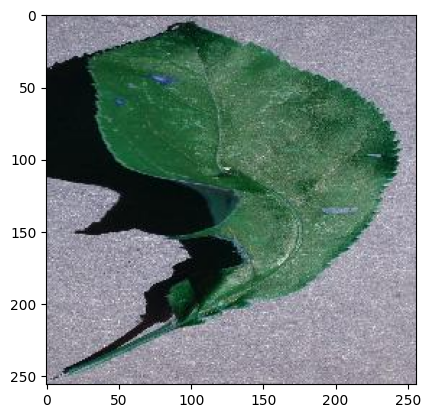

In [10]:
plt.imshow(img)

In [11]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [12]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=10,
                             width_shift_range = 0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.15)

# Create a data generator for your entire dataset with a validation split
batch_size = 32
image_size = (128, 128)  # Set to your desired image size
validation_split = 0.15  # Define the validation split ratio (e.g., 15%)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training',         # Use 'training' subset for the training generator

)

# You can also create a separate validation generator if needed
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Use 'validation' subset for the validation generator

)

Found 67263 images belonging to 88 classes.
Found 11823 images belonging to 88 classes.


In [13]:
validation_generator.class_indices

{'Apple__black_rot': 0,
 'Apple__healthy': 1,
 'Apple__rust': 2,
 'Apple__scab': 3,
 'Cassava__bacterial_blight': 4,
 'Cassava__brown_streak_disease': 5,
 'Cassava__green_mottle': 6,
 'Cassava__healthy': 7,
 'Cassava__mosaic_disease': 8,
 'Cherry__healthy': 9,
 'Cherry__powdery_mildew': 10,
 'Chili__healthy': 11,
 'Chili__leaf curl': 12,
 'Chili__leaf spot': 13,
 'Chili__whitefly': 14,
 'Chili__yellowish': 15,
 'Coffee__cercospora_leaf_spot': 16,
 'Coffee__healthy': 17,
 'Coffee__red_spider_mite': 18,
 'Coffee__rust': 19,
 'Corn__common_rust': 20,
 'Corn__gray_leaf_spot': 21,
 'Corn__healthy': 22,
 'Corn__northern_leaf_blight': 23,
 'Cucumber__diseased': 24,
 'Cucumber__healthy': 25,
 'Gauva__diseased': 26,
 'Gauva__healthy': 27,
 'Grape__black_measles': 28,
 'Grape__black_rot': 29,
 'Grape__healthy': 30,
 'Grape__leaf_blight_(isariopsis_leaf_spot)': 31,
 'Jamun__diseased': 32,
 'Jamun__healthy': 33,
 'Lemon__diseased': 34,
 'Lemon__healthy': 35,
 'Mango__diseased': 36,
 'Mango__health

In [14]:
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D

addModel = tf.keras.applications.xception.Xception(input_shape=(128,128,3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(addModel)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(n, activation="softmax" , name="classification"))

83683744/83683744 [==============================] - 4s 0us/step


In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0007,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 88)                45144     
                                                        

In [16]:
logdir = 'log'

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [20]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 20, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/20
2102/2102 [==============================] - 1741s 818ms/step - loss: 2.0847 - accuracy: 0.5159 - val_loss: 0.8684 - val_accuracy: 0.7624
Epoch 2/20
2102/2102 [==============================] - 1670s 794ms/step - loss: 0.6412 - accuracy: 0.8116 - val_loss: 0.4984 - val_accuracy: 0.8527
Epoch 3/20
2102/2102 [==============================] - 1604s 763ms/step - loss: 0.4027 - accuracy: 0.8721 - val_loss: 0.4068 - val_accuracy: 0.8784
Epoch 4/20
2102/2102 [==============================] - 1614s 768ms/step - loss: 0.3079 - accuracy: 0.9008 - val_loss: 0.3957 - val_accuracy: 0.8887
Epoch 5/20
2102/2102 [==============================] - 1535s 730ms/step - loss: 0.2561 - accuracy: 0.9147 - val_loss: 0.3735 - val_accuracy: 0.8935
Epoch 6/20
2102/2102 [==============================] - 1481s 705ms/step - loss: 0.2210 - accuracy: 0.9275 - val_loss: 0.3771 - val_accuracy: 0.9030
Epoch 7/20
2102/2102 [==============================] - 1484s 706ms/step - loss: 0.1985 - accuracy: 0.9347

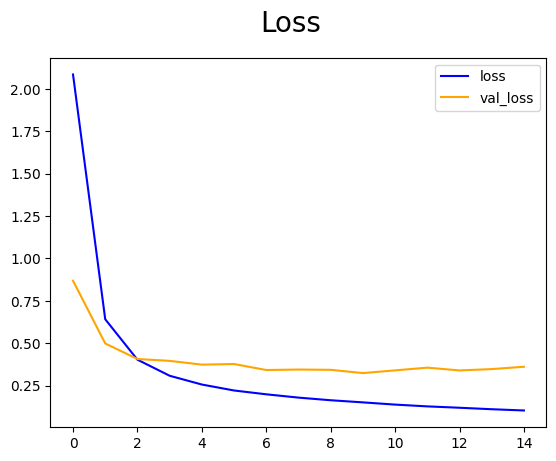

In [21]:
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc='upper right')
plt.show()

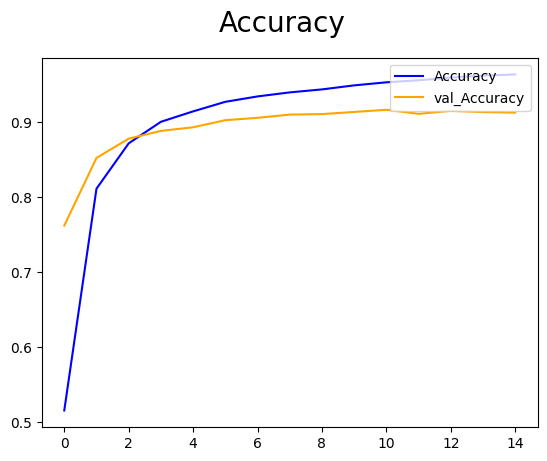

In [22]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_Accuracy')
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [23]:
from tensorflow.keras.models import load_model

In [24]:
model.save(os.path.join('sd_model','pd4classifier.h5'))

In [25]:
from tensorflow.keras.models import load_model

In [26]:
new_model = tf.keras.models.load_model('/kaggle/working/sd_model/pd4classifier.h5')

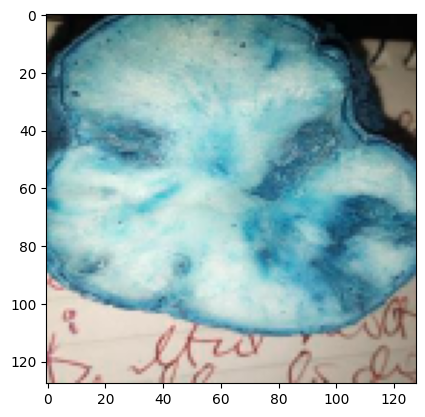

In [54]:
img = cv2.imread('/kaggle/input/plant-disease-classification-merged-dataset/Cassava__brown_streak_disease/1014492188.jpg')
resize = tf.image.resize(img, (128,128))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 22ms/step


array([[6.0985144e-04, 3.4311095e-05, 5.9778932e-02, 5.1428210e-03,
        3.2277388e-04, 2.8584376e-01, 4.5994841e-02, 7.9116605e-02,
        1.5408149e-01, 2.2617473e-04, 1.0069989e-04, 8.3110499e-04,
        1.6266893e-03, 1.7213507e-02, 1.4336193e-02, 9.4687159e-04,
        1.5183683e-03, 2.1383831e-07, 2.3501163e-05, 7.1714394e-04,
        1.8219679e-06, 5.3018801e-05, 2.1404134e-05, 5.0524427e-06,
        6.4947329e-02, 5.0464649e-02, 2.2151238e-05, 7.3626026e-05,
        5.5426340e-06, 1.2043237e-04, 1.0535409e-01, 1.4749540e-06,
        4.2283296e-05, 6.3450178e-05, 1.2258244e-04, 6.5954964e-07,
        1.1768666e-04, 2.7317767e-06, 2.8972744e-07, 1.7512889e-06,
        9.4898423e-04, 9.7445335e-04, 7.9785459e-06, 1.2641658e-05,
        2.1574387e-02, 1.7380209e-05, 2.0504013e-02, 2.5511753e-07,
        1.9318378e-08, 2.4005842e-06, 2.4609682e-07, 5.5947774e-05,
        3.1115845e-04, 1.3150556e-04, 1.7995337e-03, 8.3382329e-04,
        9.9225887e-05, 1.3894099e-04, 7.7137789e

In [56]:
prediction= label[np.argmax(yhat)]
prediction

'Cassava__brown_streak_disease'